# **LAB 6 : Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot ($x$,$y$)

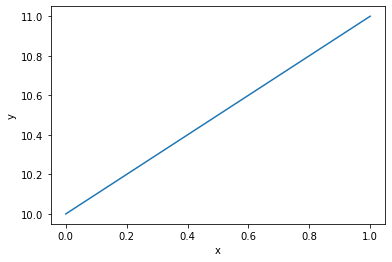

In [2]:
x = np.linspace(0, 1, 1000)
w0 = 10
w1 = 1
y = w0 + w1 * x
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot ($x$,$y_{cor}$) (use scatter plot)

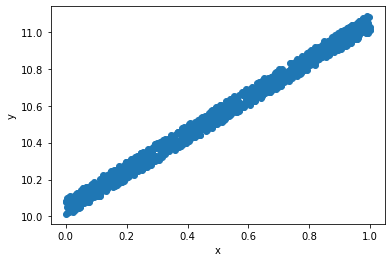

In [3]:
noise = np.random.uniform(0, 1, np.shape(y)[0])
y_corr = y + 0.1*noise
plt.scatter(x, y_corr)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs $search_{w1}$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

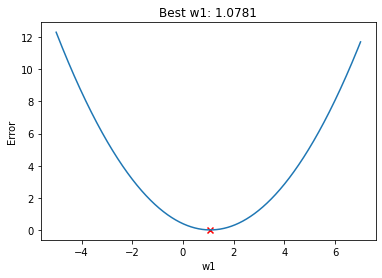

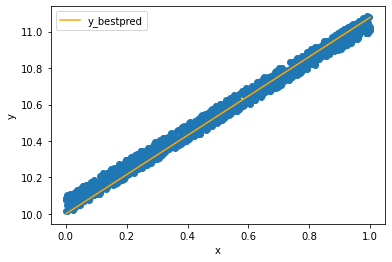

In [4]:
def error_wrt_w1(w1):
    y = w0 + w1 * x
    return np.mean((y_corr - y)**2)

w0 = 10
search_w1 = np.linspace(-5, 7, 1000)
error_w1 = []
for w1 in search_w1:
    error_w1.append(error_wrt_w1(w1))

w1_best = search_w1[np.argmin(error_w1)]
plt.plot(search_w1, error_w1)
plt.scatter(w1_best, np.min(error_w1), marker='x', color='red')
plt.title(f'Best w1: {round(w1_best, 4)}')
plt.xlabel("w1")
plt.ylabel("Error")
plt.show()

plt.scatter(x, y_corr)
plt.plot(x, w0 + w1_best * x, color='orange', label='y_bestpred')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

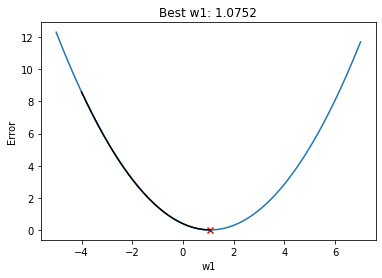

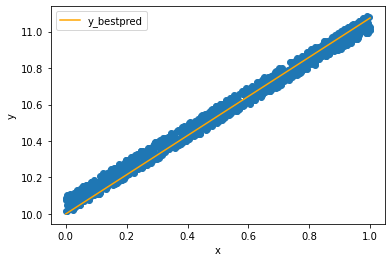

In [5]:
# gradient descent
w1 = -4
w1_hist = []
error_hist = []
prev_error = 1e10
while True:
    y = w0 + w1 * x
    error = np.mean((y_corr - y)**2)
    delta_w1 = -2 * np.mean((y_corr - y) * x)
    # Record history
    w1_hist.append(w1)
    error_hist.append(error)
    # Has error converged?
    if prev_error - error < 1e-20:
        break
    prev_error = error
    # If not descend
    w1 -= 0.01 * delta_w1

# Plot gradient descent
plt.plot(search_w1, error_w1)
plt.plot(w1_hist, error_hist, color='black')
plt.title(f'Best w1: {round(w1, 4)}')
plt.xlabel("w1")
plt.ylabel("Error")
plt.scatter(w1, error, color='red', marker='x')
plt.show()


plt.scatter(x, y_corr)
plt.plot(x, w0 + w1 * x, color='orange', label='y_bestpred')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

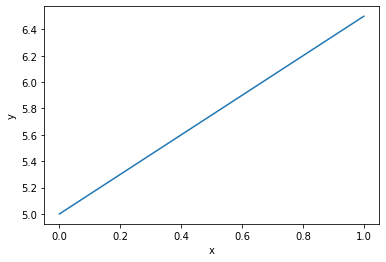

In [6]:
x = np.linspace(0, 1, 1000)
w0 = 5
w1 = 1.5
y = w0 + w1 * x
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

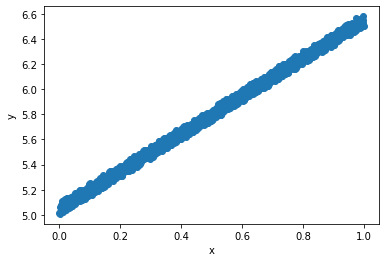

In [7]:
noise = np.random.uniform(0, 1, np.shape(y)[0])
y_corr = y + 0.1*noise
plt.scatter(x, y_corr)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

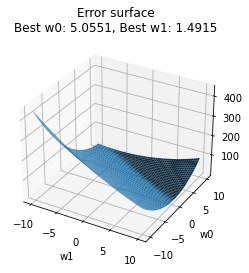

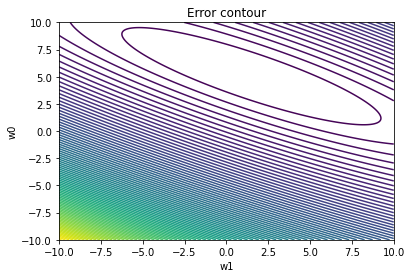

In [8]:
w0_search = np.linspace(-10, 10, 1000)
w1_search = np.linspace(-10, 10, 1000)
w0_search, w1_search = np.meshgrid(w0_search, w1_search)
error_search = np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        error_search[i, j] = np.mean((y_corr - (w0_search[i, j] + w1_search[i, j] * x))**2)

# Find best w0 and w1
w0_best = w0_search[np.unravel_index(np.argmin(error_search), error_search.shape)]
w1_best = w1_search[np.unravel_index(np.argmin(error_search), error_search.shape)]

# Plot surface plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(w1_search, w0_search, error_search)
plt.title(f"Error surface\nBest w0: {round(w0_best, 4)}, Best w1: {round(w1_best, 4)}")
plt.xlabel("w1")
plt.ylabel("w0")
plt.show()

# Plot contour plot
plt.contour(w1_search, w0_search, error_search, 100)
plt.title("Error contour")
plt.xlabel("w1")
plt.ylabel("w0")
plt.show()

**Gradient Descent to find optimal Values**

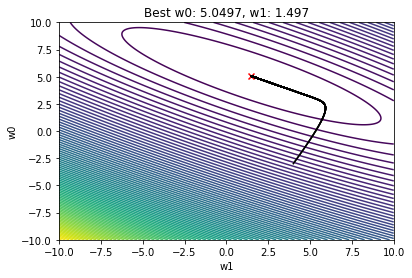

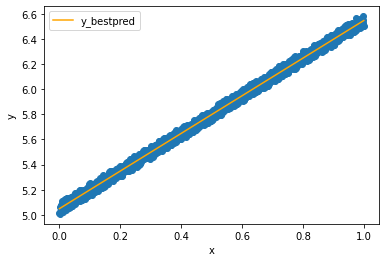

In [9]:
# Gradient Descent
# Initialize w0 and w1
w0 = -3
w1 = 4
w0_hist = []
w1_hist = []
error_hist = []
prev_error = 1e10
while True:
    error = np.mean((y_corr - (w0 + w1 * x))**2)
    delta_w0 = -2 * np.mean(y_corr - (w0 + w1 * x))
    delta_w1 = -2 * np.mean((y_corr - (w0 + w1 * x)) * x)
    # Record history
    w0_hist.append(w0)
    w1_hist.append(w1)
    error_hist.append(error)
    # Has error converged?
    if prev_error - error < 1e-30:
        break
    prev_error = error
    # If not descend
    w0 -= 0.01 * delta_w0
    w1 -= 0.01 * delta_w1

# Plot gradient descent
plt.contour(w1_search, w0_search, error_search, 100)
for i in range(len(w0_hist)-1):
    plt.plot(w1_hist[i:i+2], w0_hist[i:i+2], color='black')
plt.scatter(w1, w0, color='red', marker='x')
plt.title(f'Best w0: {round(w0, 4)}, w1: {round(w1, 4)}')
plt.xlabel("w1")
plt.ylabel("w0")
plt.show()

# Plot the best fit line
plt.scatter(x, y_corr)
plt.plot(x, w0 + w1 * x, color='orange', label='y_bestpred')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


# Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

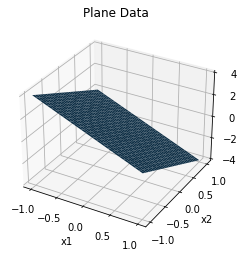

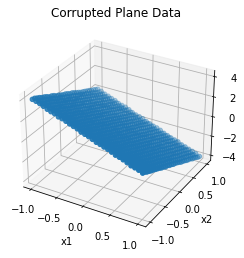

In [10]:
x1 = np.linspace(-1, 1, 30)
x2 = np.linspace(-1, 1, 30)
x1, x2 = np.meshgrid(x1, x2)

w0 = 0
w1 = -2
w2 = -2
y = w0 + w1 * x1 + w2 * x2
y_corr = y + 0.1 * np.random.uniform(0, 1, np.shape(y))

# Plot surface plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x1, x2, y)
plt.title("Plane Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Plot scatter plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x1, x2, y_corr)
plt.title("Corrupted Plane Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

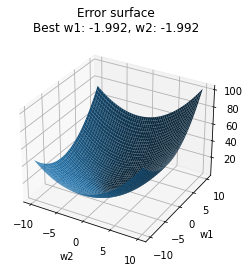

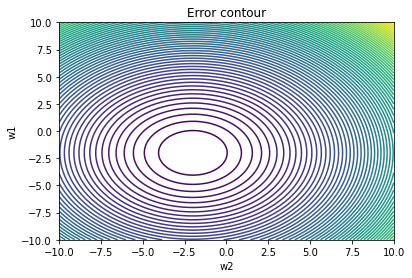

In [11]:
w1_search = np.linspace(-10, 10, 1000)
w2_search = np.linspace(-10, 10, 1000)
w1_search, w2_search = np.meshgrid(w1_search, w2_search)
error_search = np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        error_search[i, j] = np.mean((y_corr - (w0 + w1_search[i, j] * x1 + w2_search[i, j] * x2))**2)

# Get best w1 and w2
i1, i2 = np.unravel_index(np.argmin(error_search), error_search.shape)
w1 = w1_search[i1, i2]
w2 = w2_search[i1, i2]

# Plot surface plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(w2_search, w1_search, error_search)
plt.title(f"Error surface\nBest w1: {round(w1, 4)}, w2: {round(w2, 4)}")
plt.xlabel("w2")
plt.ylabel("w1")
plt.show()

# Plot contour plot
plt.contour(w2_search, w1_search, error_search, 100)
plt.title("Error contour")
plt.xlabel("w2")
plt.ylabel("w1")
plt.show()

**Prediction using Gradient Descent**

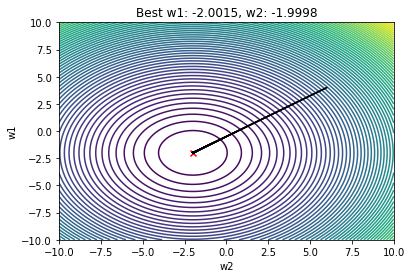

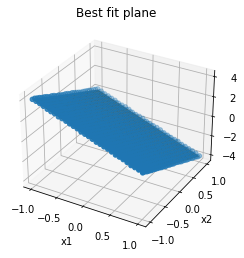

In [12]:
# Gradient Descent
# Initialize w1 and w2
w1 = 4
w2 = 6
w1_hist = []
w2_hist = []
error_hist = []
prev_error = 1e10
while True:
    err = np.mean((y_corr - (w0 + w1 * x1 + w2 * x2))**2)
    delta_w1 = -2 * np.mean((y_corr - (w0 + w1 * x1 + w2 * x2)) * x1)
    delta_w2 = -2 * np.mean((y_corr - (w0 + w1 * x1 + w2 * x2)) * x2)
    # Record history
    w1_hist.append(w1)
    w2_hist.append(w2)
    error_hist.append(err)
    # Has error converged?
    if prev_error - err < 1e-30:
        break
    prev_error = err
    # If not descend
    w1 -= 0.01 * delta_w1
    w2 -= 0.01 * delta_w2

# Plot gradient descent
plt.contour(w2_search, w1_search, error_search, 100)
for i in range(len(w1_hist)-1):
    plt.plot(w2_hist[i:i+2], w1_hist[i:i+2], color='black')
plt.scatter(w2, w1, color='red', marker='x')
plt.title(f'Best w1: {round(w1, 4)}, w2: {round(w2, 4)}')
plt.xlabel("w2")
plt.ylabel("w1")
plt.show()

# Plot the best fit plane
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(x1, x2, y_corr)
ax.plot_surface(x1, x2, w0 + w1 * x1 + w2 * x2, color='orange', label='y_bestpred')
plt.title("Best fit plane")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

Shape of x: (5, 1000)
Shape of w: (6, 1)
Shape of x_aug: (6, 1000)
Shape of y: (1000, 1)
Optimal weight vector by Normal Equation:
[[-0.91110312]
 [ 0.34260557]
 [ 0.1609162 ]
 [-0.72466604]
 [-0.83375115]
 [-0.30204883]]
Optimal weight vector by Gradient Descent:
[[-0.91114007]
 [ 0.33218104]
 [ 0.15924531]
 [-0.71458402]
 [-0.83066087]
 [-0.30611755]]


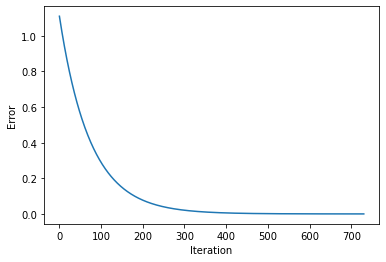

In [13]:
class Regression:
	# Constructor
	def __init__(self, name='reg'):
		self.name = name  # Create an instance variable

	def grad_update(self,w_old,lr,y,x):
		w = w_old + 2 * lr / y.shape[0] * (x @ (y - x.T @ w_old))
		return w

	def error(self,w,y,x):
		return np.mean((y - x.T @ w)**2)

	def mat_inv(self,y,x_aug):
		return np.linalg.inv(x_aug @ x_aug.T) @ x_aug @ y
	
	# By Gradien descent

	def Regression_grad_des(self,x,y,lr):
		err = []
		w_pred = np.random.uniform(-1, 1, (x.shape[0], 1))

		for i in range(1000):
			w_pred = self.grad_update(w_pred,lr,y,x)
			err.append(self.error(w_pred,y,x))
			if i > 1:
				dev = np.abs(err[-2] - err[-1])
			else:
				dev = 1
			if dev<=0.000001:
				break

		return w_pred, err


#############################################################################
# Generation of data

sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(f"Shape of x: {x.shape}")

# Initialise the weight matrix (W=[w0,w1,.....,wM]')
w = np.random.uniform(-1,1,(sim_dim+1,1))
print(f"Shape of w: {w.shape}")

# Augment the data so as to include x0 also which is a vector of ones)
x_aug = np.vstack((np.ones((1,sim_no_data)),x))
print(f"Shape of x_aug: {x_aug.shape}")

y=x_aug.T @ w  # vector multiplication
print(f"Shape of y: {y.shape}")

## Corrupt the input by adding noise 
noise=np.random.uniform(0,1,y.shape)
y=y+0.1*noise

### The data (x_aug and y) is generated ###

#############################################################################

# By Computation (Normal Equation)
reg = Regression()
w_opt=reg.mat_inv(y,x_aug)
print(f"Optimal weight vector by Normal Equation:")
print(w_opt)

# By Gradien descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print(f"Optimal weight vector by Gradient Descent:")
print(w_pred)

plt.plot(err)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()


# Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

Optimal weight vector by Normal Equation:
[[2.e+04]
 [2.e+03]
 [1.e+02]
 [2.e+00]
 [3.e+02]
 [5.e+03]]
Mean squared error on test set: 1.25697042394578e-20

------------------

Optimal weight vector by Gradient Descent:
[[1082.84398219]
 [2677.18323002]
 [ 353.34703048]
 [ 204.32025956]
 [1675.96284235]
 [5551.79966101]]


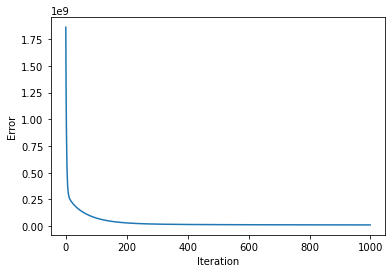

Mean squared error on test set: 10287251.086678071

------------------

Optimal weight vector by sklearn:
[20000.]
[[2.e+03]
 [1.e+02]
 [2.e+00]
 [3.e+02]
 [5.e+03]]
Mean squared error on test set: 2.6483014491497736e-22


In [14]:
import pandas as pd

# Read data from csv file
data = pd.read_csv('salary_pred_data.csv')

# Do train test split (90% train, 10% test)
train = data.sample(frac=0.9, random_state=0)
test = data.drop(train.index)

# Compute optimal weights using the regression class
x = train[['Level of city', 'Years of experiance', 'Age', 'Level of education', 'Job profile']].values.T
y = train[['Salary']].values
x_aug = np.vstack((np.ones((1, x.shape[1])), x))

x_test = test[['Level of city', 'Years of experiance', 'Age', 'Level of education', 'Job profile']].values.T
y_test = test[['Salary']].values
x_test_aug = np.vstack((np.ones((1, x_test.shape[1])), x_test))

# By Computation (Normal Equation)
reg = Regression()
w_opt = reg.mat_inv(y, x_aug)
print(f"Optimal weight vector by Normal Equation:")
print(w_opt)

# Find the mean squared error on the test set
y_pred = x_test_aug.T @ w_opt
mse = np.mean((y_test - y_pred)**2)
print(f"Mean squared error on test set: {mse}")

print("\n------------------\n")

# By Gradien descent
lr = 5e-4
w_pred, err = reg.Regression_grad_des(x_aug, y, lr)
print(f"Optimal weight vector by Gradient Descent:")
print(w_pred)

plt.plot(err)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

# Find the mean squared error on the test set
y_pred = x_test_aug.T @ w_pred
mse = np.mean((y_test - y_pred)**2)
print(f"Mean squared error on test set: {mse}")

print("\n------------------\n")

# Find optimal weights using the sklearn library
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.T, y)
print(f"Optimal weight vector by sklearn:")
print(reg.intercept_)
print(reg.coef_.T)
print(f"Mean squared error on test set: {np.mean((y_test - reg.predict(x_test.T))**2)}")
